# A sample example to tune xgboost classifier showing a complex search space definition

In [1]:
from mango.tuner import Tuner

In [2]:
from scipy.stats import uniform

param_dict = {"learning_rate": uniform(0.01, 0.5),
              "gamma": uniform(0.5, 0.5),
              "max_depth": range(1,14),
              "n_estimators": range(500,2000),
              "subsample": uniform(0.7, 0.3),
              "colsample_bytree":uniform(0.3, 0.7),
              "colsample_bylevel":uniform(0.3, 0.7),
              "min_child_weight": range(1,10)}


# userObjective

In [3]:
from classifiers.xgboosttree import Xgboosttree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import numpy as np

model = Xgboosttree()

import os
data_path = os.path.abspath('.')+'/classifiers/data/'

X_train, y_train =model.load_train_dataset(data_path+"PJME/train_data")
X_test, y_test = model.load_train_dataset(data_path+"PJME/test_data")
X_validate, y_validate = model.load_train_dataset(data_path+"PJME/validate_data")




count_called = 1

def objective_Xgboost(args_list):
    global X_train, y_train, model, count_called
    
    print('count_called:',count_called)
    
    count_called = count_called + 1
    results = []
    for hyper_par in args_list:
        clf = Xgboosttree(**hyper_par)
        clf.fit(X_train, y_train.ravel())
        y_pred = clf.predict(X_validate) 
        mse = mean_squared_error(y_validate, y_pred)
        mse = mse/10e5
        result =  (-1.0) * mse
        results.append(result)
        
    return results

In [19]:
conf_Dict = dict()
conf_Dict['initial_random']=4
conf_Dict['batch_size'] = 2
conf_Dict['num_iteration'] = 20
conf_Dict['domain_size'] = 10000

# Defining Tuner

In [20]:
tuner_user = Tuner(param_dict, objective_Xgboost,conf_Dict)

In [21]:
tuner_user.getConf()

{'param_dict': {'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a20408cf8>,
  'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a20408f28>,
  'max_depth': range(1, 14),
  'n_estimators': range(500, 2000),
  'subsample': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a20414438>,
  'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a204145c0>,
  'colsample_bylevel': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a20414748>,
  'min_child_weight': range(1, 10)},
 'userObjective': <function __main__.objective_Xgboost(args_list)>,
 'domain_size': 10000,
 'initial_random': 4,
 'num_iteration': 20,
 'objective': 'maximize',
 'batch_size': 2}

In [22]:
import time
start_time = time.clock()

results = tuner_user.maximize()

end_time = time.clock()


print(end_time - start_time)

count_called: 12
[17:09:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 13
[17:09:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 14
[17:09:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 15
[17:

# Inspect the results

In [9]:
print('best hyper parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best hyper parameters: {'colsample_bylevel': 0.8927302462056583, 'colsample_bytree': 0.5901897648143315, 'gamma': 0.6349702397579651, 'learning_rate': 0.20648134681094177, 'max_depth': 2, 'min_child_weight': 6, 'n_estimators': 881, 'subsample': 0.898512366973724}
best objective: -11.888223833456744


In [10]:
print('Sample hyper parameters tried:',len(results['params_tried']))
print(results['params_tried'][:2])

Sample hyper parameters tried: 24
[{'colsample_bylevel': 0.7818348320013179, 'colsample_bytree': 0.48657232417018764, 'gamma': 0.6812747399544958, 'learning_rate': 0.1602187145792936, 'max_depth': 2, 'min_child_weight': 7, 'n_estimators': 1653, 'subsample': 0.8048925879549675}, {'colsample_bylevel': 0.848284906787313, 'colsample_bytree': 0.8906393753517341, 'gamma': 0.8977498000884847, 'learning_rate': 0.5078380100089659, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 1504, 'subsample': 0.7636900323030039}]


In [11]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 24
[-11.924968680454924, -20.216148785124805, -16.716115013423664, -14.919397073058315, -26.05135193060418]


# Plotting the actual variation in objective values of the tried results

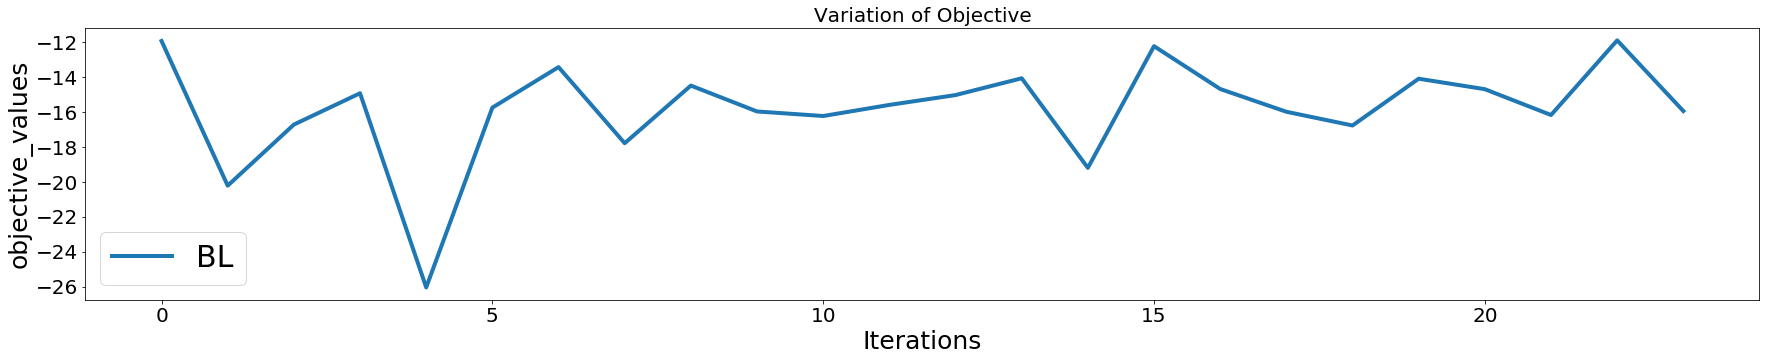

In [13]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

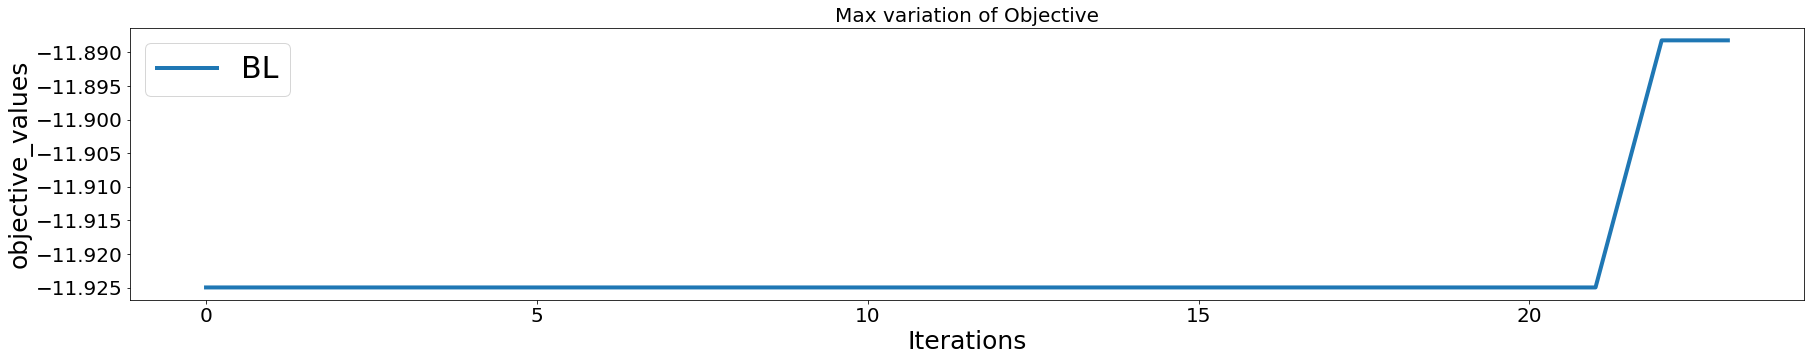

In [14]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the Result

In [15]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_objective': -11.888223833456744,
    'best_params': {   'colsample_bylevel': 0.8927302462056583,
                       'colsample_bytree': 0.5901897648143315,
                       'gamma': 0.6349702397579651,
                       'learning_rate': 0.20648134681094177,
                       'max_depth': 2,
                       'min_child_weight': 6,
                       'n_estimators': 881,
                       'subsample': 0.898512366973724},
    'objective_values': [   -11.924968680454924,
                            -20.216148785124805,
                            -16.716115013423664,
                            -14.919397073058315,
                            -26.05135193060418,
                            -15.743902551146775,
                            -13.421383204759314,
                            -17.78353767349733,
                            -14.480766862295182,
                            -15.963962619514122,
                            -16.225181458319

# See the learned classifier result on the test data

In [16]:
model = Xgboosttree(**results['best_params'])
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test) 

[17:08:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


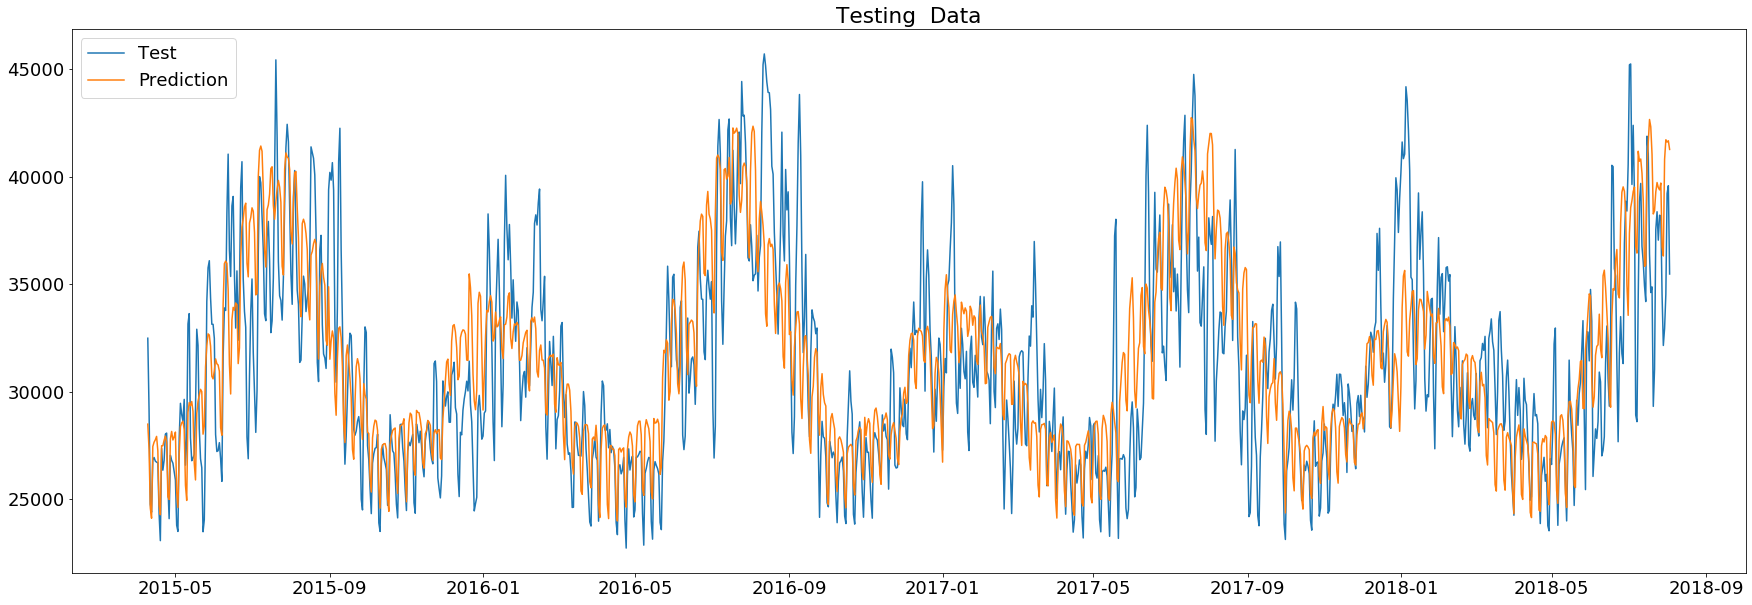

In [17]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 18})
plt.plot(X_test,y_test,label='Test')
plt.plot(X_test,y_pred,label='Prediction')
plt.title('Testing  Data')
plt.legend()
plt.show()

# All the Data

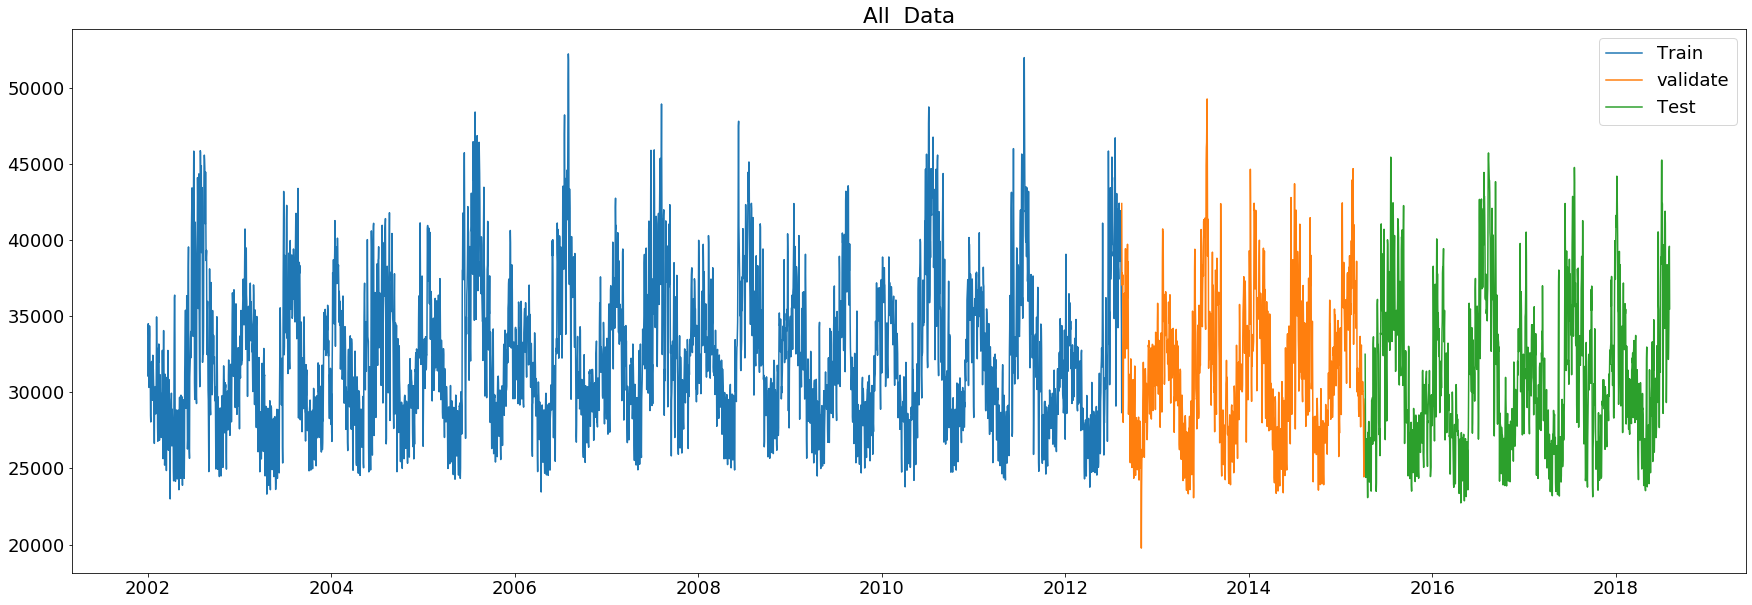

In [18]:
from classifiers.xgboosttree import Xgboosttree

model = Xgboosttree()

import os
data_path = os.path.abspath('.')+'/classifiers/data/'

X_train, y_train =model.load_train_dataset(data_path+"PJME/train_data")
X_test, y_test = model.load_train_dataset(data_path+"PJME/test_data")
X_validate, y_validate = model.load_train_dataset(data_path+"PJME/validate_data")




from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 18})
plt.plot(X_train,y_train,label='Train')
plt.plot(X_validate,y_validate,label='validate')
plt.plot(X_test,y_test,label='Test')
plt.title('All  Data')
plt.legend()
plt.show()
